In [2]:
#Load and Explore Data

import pandas as pd

# Load the CSV file
df = pd.read_csv("Mall_Customers.csv")  # Make sure the file is in the same folder

# Show first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Check basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Get descriptive statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

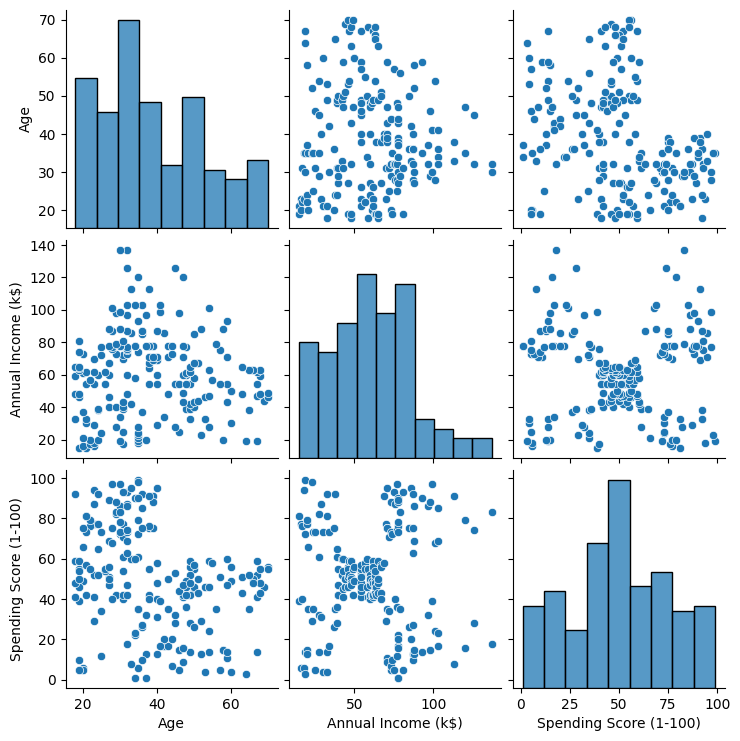

In [7]:
#visualize the data
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()



<Axes: xlabel='Age', ylabel='Count'>

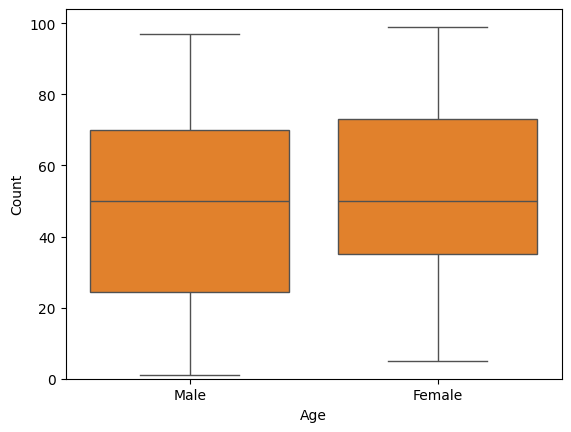

In [8]:
# Distribution
sns.histplot(df['Age'], kde=True)
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)

In [15]:
print(df.columns)


Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [16]:
# No need to drop CustomerID since it's not present

# Convert 'Gender' to numeric (Male = 1, Female = 0)
df = pd.get_dummies(df, drop_first=True)


In [17]:
#feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)


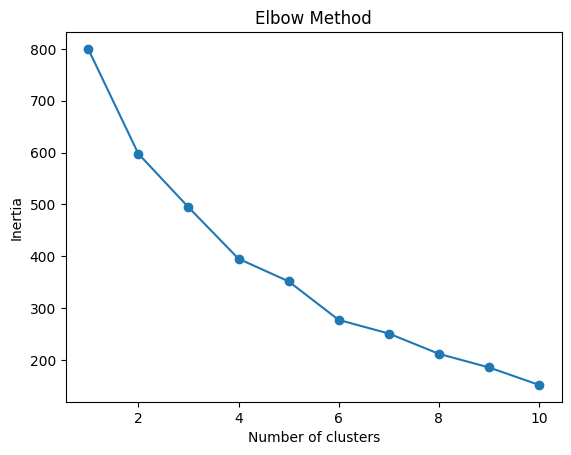

In [18]:
# Apply K-Means Clustering
# Find the optimal number of clusters (Elbow Method)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [19]:
#Apply K-Means with optimal k (say, 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


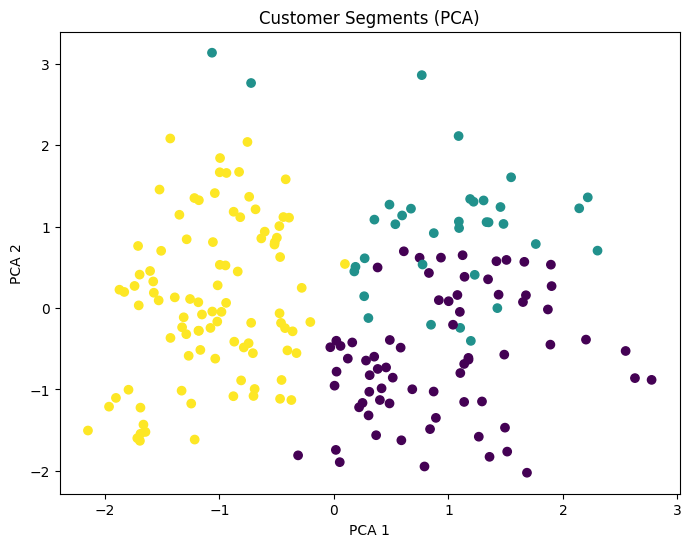

In [20]:
#visualize cluster
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8,6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segments (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [21]:
#analyze each cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


               Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
Cluster                                                                    
0        52.169014           46.676056               39.295775     0.394366
1        40.228571           91.342857               20.628571     0.628571
2        28.276596           59.585106               69.446809     0.404255


In [22]:
#save the model
import joblib

joblib.dump(kmeans, 'customer_segmentation_model.pkl')


['customer_segmentation_model.pkl']

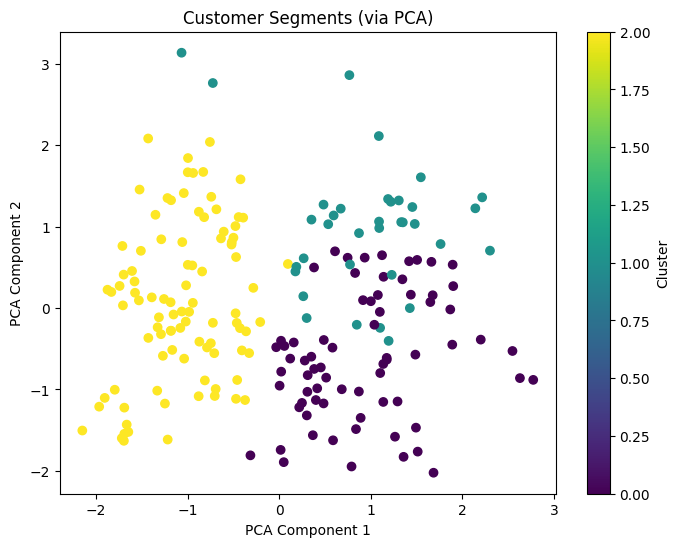

In [23]:
#Visualize Final Clusters with Labels
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(pca_features[:,0], pca_features[:,1], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segments (via PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [24]:
#Add Cluster Descriptions
df['Cluster'].value_counts()
df.groupby('Cluster').mean()
#Cluster 0: “Young high-spending customers”

#Cluster 1: “Older low-spending customers”


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
Cluster,,,,
0,52.169014,46.676056,39.295775,0.394366
1,40.228571,91.342857,20.628571,0.628571
2,28.276596,59.585106,69.446809,0.404255
